In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

In [19]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#1. Generating summary statistics (mean, median, std, etc.)
print("Generating the summary statistics for the dataset:")
df.describe()

Generating the summary statistics for the dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
#2. Visualize numeric features using boxplot/histograms
#Removing columns that are  not needed
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex','Embarked']]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.0,1,0,7.2500,male,S
1,1,1,38.0,1,0,71.2833,female,C
2,1,3,26.0,0,0,7.9250,female,S
3,1,1,35.0,1,0,53.1000,female,S
4,0,3,35.0,0,0,8.0500,male,S


In [22]:
#Data Cleanup
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df['Sex'] = df['Sex'].str.upper()
df['Sex'] = df['Sex'].map({'MALE': 0, 'FEMALE': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False).astype(int)

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,0,0,1
1,1,1,38,1,0,71,1,1,0,0
2,1,3,26,0,0,7,1,0,0,1
3,1,1,35,1,0,53,1,0,0,1
4,0,3,35,0,0,8,0,0,0,1


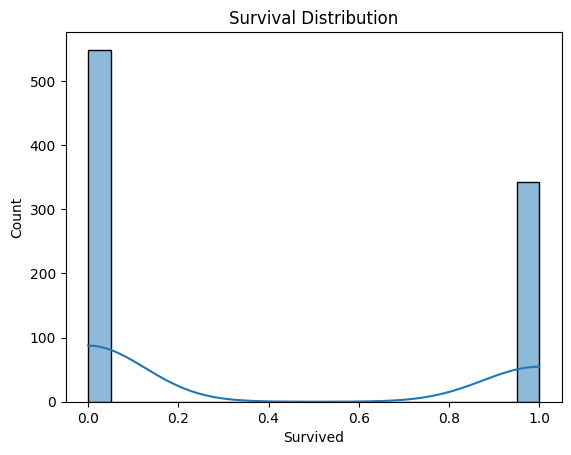

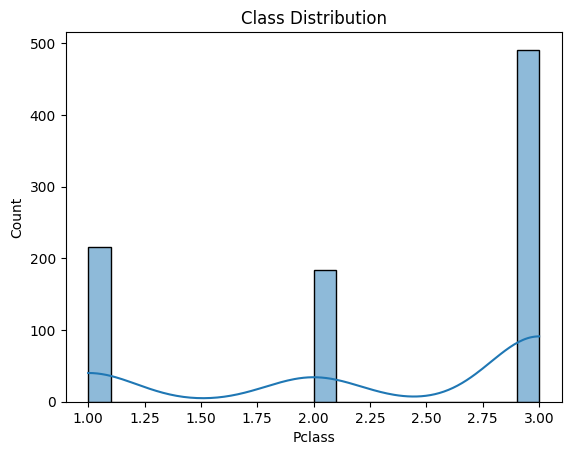

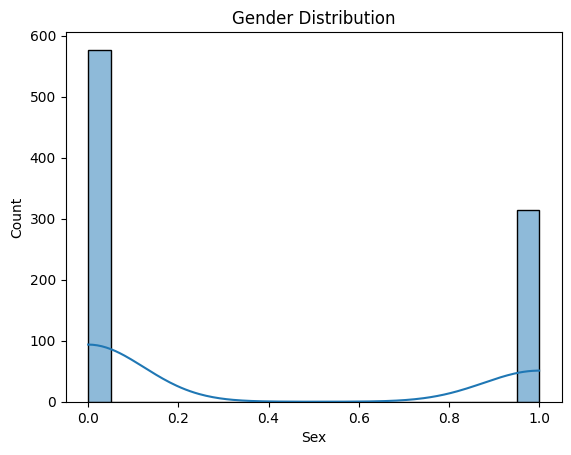

In [43]:
sns.histplot(df['Survived'], kde=True, bins=20)
plt.title("Survival Distribution")
plt.show()
sns.histplot(df['Pclass'], kde=True, bins=20)
plt.title("Class Distribution")
plt.show()
sns.histplot(df['Sex'], kde=True, bins=20)
plt.title("Gender Distribution")
plt.show()

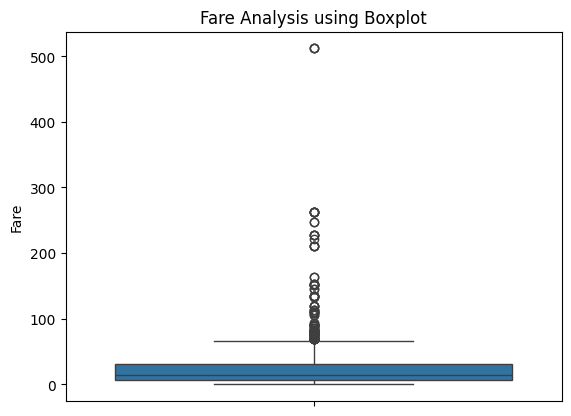

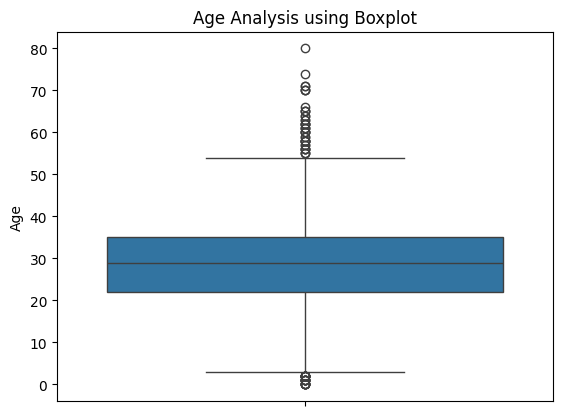

In [41]:
sns.boxplot(y=df['Fare'])
plt.title("Fare Analysis using Boxplot")
plt.show()
sns.boxplot(y=df['Age'])
plt.title("Age Analysis using Boxplot")
plt.show()

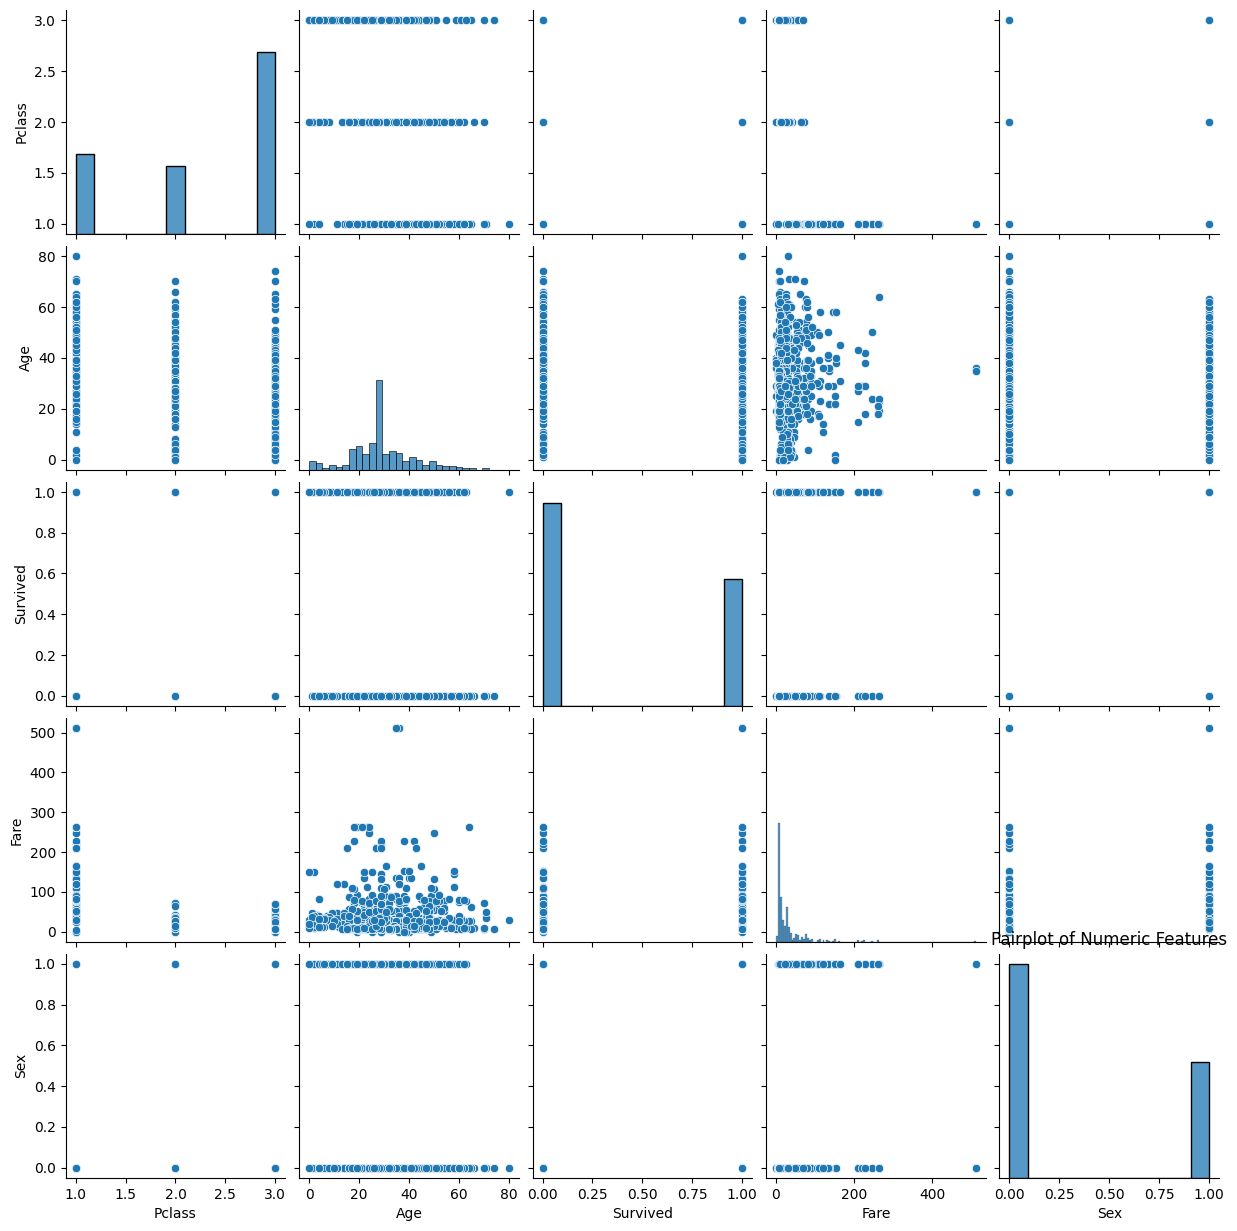

In [36]:
#3. Analyse feature relationships using pairplot/correlation matrix
sns.pairplot(df[['Pclass','Age','Survived','Fare','Sex'])
plt.title("Pairplot of Numeric Features")
plt.show()

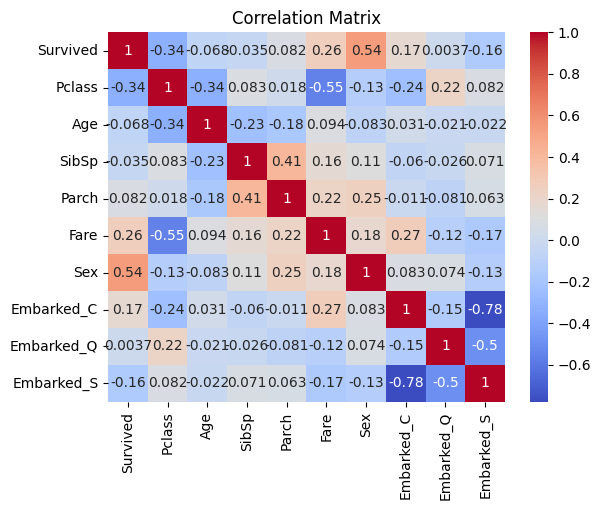

In [37]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

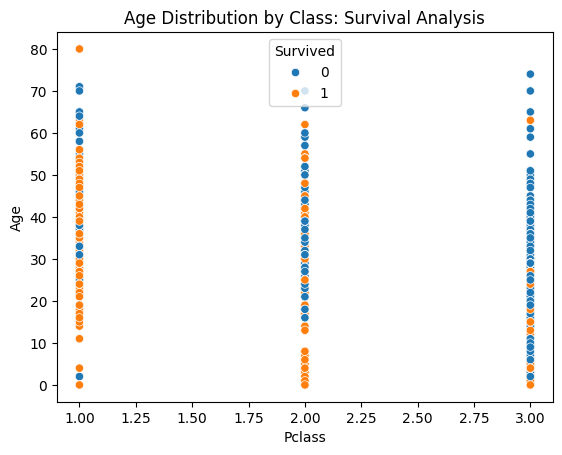

In [48]:
#4. Identify patterns/trends etc in data
sns.scatterplot(data=df, x='Pclass', y='Age', hue='Survived')
plt.title("Age Distribution by Class: Survival Analysis")
plt.show()

In [49]:
# Above distribution can be used to make following inferences:
#1. Class 1 has more yellow data points, hence more Class 1 travellers survives
#2. For Class 2 and 3, lower ages had comparitively higher survivals than higher ages
#3. Class 3 has least number of survivals

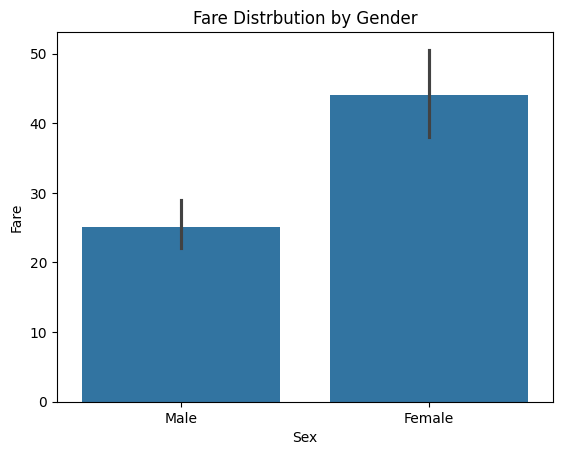

In [54]:
sns.barplot(data=df, x='Sex', y='Fare')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.title("Fare Distrbution by Gender")
plt.show()

In [55]:
# Above distribution can be used to make following inference:
# Females had to pay higher fare than males

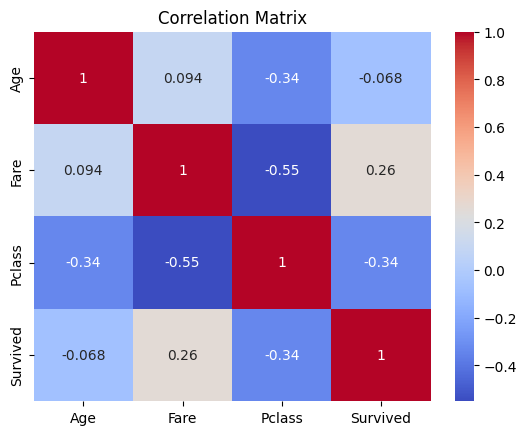

In [64]:
#5. Make basic feature-level inferences from visuals
corr_matrix = df[["Age","Fare","Pclass","Survived"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [65]:
#Inferences:
#1. Fare and Survived have a positive correlation: Higher the fare, better the chances of survival
#2. Pclass and Survived have a negative correlation: Class 1 has higher survival chance than Class 3
#3. Age and Survived have a low negative correlation: Lower Age has slightly higher survival chance than Higher Age